In [64]:
%matplotlib inline
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import seaborn as sns

# Comparison of LSST gender balance with RAS demographics survey

## Assumptions:

* Assumes binary gender
* Only considered numbers in RAS demographics survey for Astronomy and Solar System Science
* Googled each person on 2018 LSST:UK AP list and assumed their position info is up to date

In [2]:
lsst_df = pd.read_csv('lsst_roles.csv')

In [3]:
lsst_df

,first_name,last_name,last_year,gender,role
0,Filipe,Abdalla,2020,m,slr
1,Omar,Almaini,2020,m,p
2,Farrukh,Azfar,2020,m,l
3,David,Bacon,2019,m,slr
4,Vasily,Belokurov,2019,m,slr
5,Malcolm,Bremer,2020,m,p
6,Sarah,Bridle,2019,f,p
7,Michael,Brown,2019,m,p
8,Erminia,Calabrese,2019,f,l
9,Michael,Childress,2018,m,l


### LSST AP data for 2018:
* Grabbed from the LSST:UK wiki. 
* Googled each person and assumed their position info is up to date:
 - p = Professor
 - slr = Senior Lecturer / Reader
 - l = Lecturer
* Only done this analysis for APs. As it was done by hand, too time consuming right now for JAs. Do we have demographics/position info saved for JA applicants?

### RAS demographics data

Total numbers for astro and solar system from Tables 1 and 3 of RAS demographics survey: https://www.ras.org.uk/images/stories/DemographicSurvey/2017/demographic_survey_full.pdf

* XXX\_astro = Astronomy
* XXX\_sss = Solar System Science

In [4]:
ras_tab_1 = pd.read_csv('ras_demos_tab1.csv', index_col=0, names=('n_astro', 'n_sss'), skiprows=[0])
ras_tab_3 = pd.read_csv('ras_demos_tab3.csv', index_col=0, names=('percent_f_astro', 'percent_f_sss'), skiprows=[0])


In [5]:
ras_tab_1

,n_astro,n_sss
prof,256,56
sl_r,165,47
lec,106,31


In [6]:
ras_tab_3

,percent_f_astro,percent_f_sss
prof,11.6,21.2
sl_r,18.2,22.2
lec,29.2,27.6


In [7]:
ras_numbers_df = ras_tab_1.join(ras_tab_3)

In [8]:
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss
prof,256,56,11.6,21.2
sl_r,165,47,18.2,22.2
lec,106,31,29.2,27.6


In [9]:
ras_numbers_df['n_female_astro_round'] = np.around(ras_numbers_df['n_astro'] * (ras_numbers_df['percent_f_astro'] / 100.),0)
ras_numbers_df['n_female_sss_round'] = np.around(ras_numbers_df['n_sss'] * (ras_numbers_df['percent_f_sss'] / 100.),0)

In [10]:
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round
prof,256,56,11.6,21.2,30.0,12.0
sl_r,165,47,18.2,22.2,30.0,10.0
lec,106,31,29.2,27.6,31.0,9.0


Rounded to nearest whole number in n\_female\_XXX\_round so we're not dealing with fractions of people.

In [11]:
lsst_total_ap = len(lsst_df)
print(lsst_total_ap)

90


In [12]:
lsst_total_profs = np.sum(lsst_df.role =='p')
lsst_total_slr = np.sum(lsst_df.role =='slr')
lsst_total_l = np.sum(lsst_df.role =='l')

print(lsst_total_profs, lsst_total_slr, lsst_total_l)

40 31 19


In [13]:
lsst_female_profs = len(lsst_df[(lsst_df.role =='p') & (lsst_df.gender =='f')])
lsst_female_slr = len(lsst_df[(lsst_df.role =='slr') & (lsst_df.gender =='f')])
lsst_female_l = len(lsst_df[(lsst_df.role =='l') & (lsst_df.gender =='f')])




print(lsst_female_profs, lsst_female_slr, lsst_female_l)

7 2 6


In [14]:
lsst_pc_female_profs = lsst_female_profs / lsst_total_profs
lsst_pc_female_slr = lsst_female_slr / lsst_total_slr
lsst_pc_female_l = lsst_female_l / lsst_total_l


print(lsst_pc_female_profs, lsst_pc_female_slr, lsst_pc_female_l)

0.175 0.0645161290323 0.315789473684


# How to do a fair comparison?

## Adding together RAS numbers for Astro and Solar System science

* LSST:UK covers astro and sss
* Assuming that we should pull from the communities in the same fraction that they appear in the wild.
* Sum total number in each field/role in RAS demographics survey

In [15]:
ras_numbers_df['n_total_astro_sss'] = ras_numbers_df.n_astro + ras_numbers_df.n_sss
ras_numbers_df['n_female_total_astro_sss'] = ras_numbers_df.n_female_astro_round + ras_numbers_df.n_female_sss_round

In [16]:
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss
prof,256,56,11.6,21.2,30.0,12.0,312,42.0
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0
lec,106,31,29.2,27.6,31.0,9.0,137,40.0


Now get those total numbers as percentage female

In [17]:
ras_numbers_df['percentage_female_astro_sss'] = ras_numbers_df.n_female_total_astro_sss / ras_numbers_df.n_total_astro_sss
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss
prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679
lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971


These numbers should be a reasonable 'host population' to compare to the LSST:UK AP sample

In [18]:
comparison_df = ras_numbers_df.copy()

In [19]:
comparison_df['lsst_percent_female'] = [lsst_pc_female_profs, lsst_pc_female_slr, lsst_pc_female_l]
comparison_df['lsst_total_female'] = [lsst_female_profs, lsst_female_slr, lsst_female_l]

In [20]:
comparison_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female
prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2
lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6


What would the numbers be if we did match the RAS demographics?

In [21]:
comparison_df['lsst_total'] = [lsst_total_profs, lsst_total_slr, lsst_total_l]
comparison_df['lsst_predicted_number'] = np.around(comparison_df.percentage_female_astro_sss * comparison_df.lsst_total, 0)
comparison_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female,lsst_total,lsst_predicted_number
prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7,40,5.0
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2,31,6.0
lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6,19,6.0


In [22]:
comparison_df.reset_index(inplace=True)
comparison_df.rename(index=str, columns={"index": "role"}, inplace=True)
comparison_df

,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female,lsst_total,lsst_predicted_number
0,prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7,40,5.0
1,sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2,31,6.0
2,lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6,19,6.0


<Figure size 720x720 with 0 Axes>

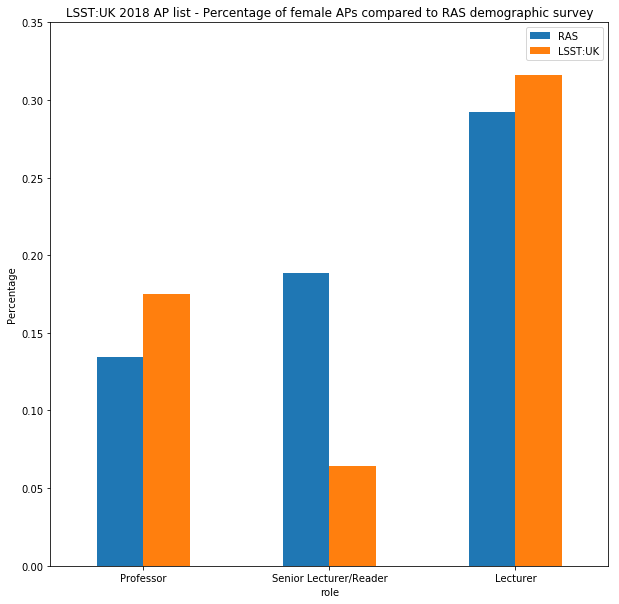

In [23]:
mp.figure(figsize=(10,10))
comparison_df[['percentage_female_astro_sss', 'lsst_percent_female']].plot.bar(x=comparison_df.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Percentage')
mp.title('LSST:UK 2018 AP list - Percentage of female APs compared to RAS demographic survey')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 0.4, 0.05))
mp.legend(["RAS", "LSST:UK"])

mp.savefig('lsst_gender_balance_percentages.pdf')



<Figure size 720x720 with 0 Axes>

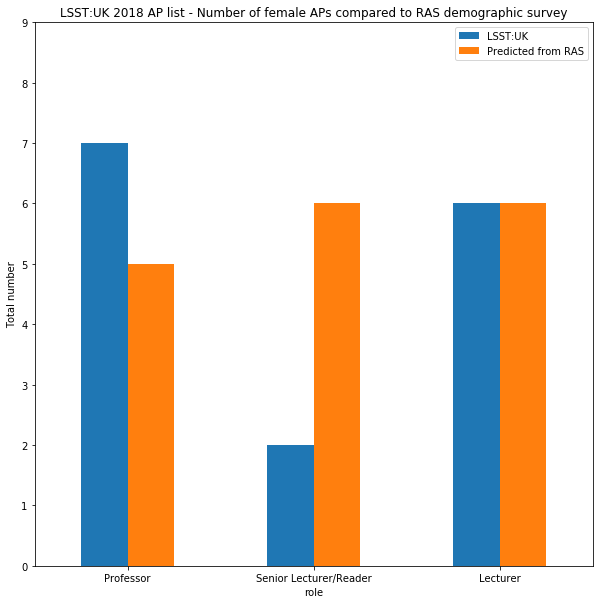

In [24]:
mp.figure(figsize=(10,10))
comparison_df[['lsst_total_female', 'lsst_predicted_number']].plot.bar(x=comparison_df.role, figsize=(10,10), rot=0)
ind = np.arange(3)
mp.ylabel('Total number')
mp.title('LSST:UK 2018 AP list - Number of female APs compared to RAS demographic survey')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 10, 1))
mp.legend(["LSST:UK", "Predicted from RAS"])


mp.savefig('lsst_gender_balance_totals.pdf')

In [25]:
comparison_df['lsst_total_male'] = comparison_df.lsst_total - comparison_df.lsst_total_female
comparison_df

,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female,lsst_total,lsst_predicted_number,lsst_total_male
0,prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7,40,5.0,33
1,sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2,31,6.0,29
2,lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6,19,6.0,13


<Figure size 720x720 with 0 Axes>

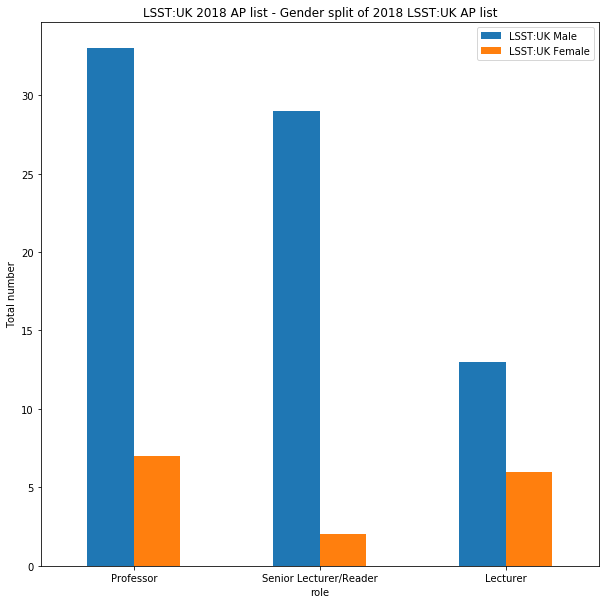

In [26]:
mp.figure(figsize=(10,10))
comparison_df[['lsst_total_male', 'lsst_total_female']].plot.bar(x=comparison_df.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Total number')
mp.title('LSST:UK 2018 AP list - Gender split of 2018 LSST:UK AP list')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 35, 5))
mp.legend(["LSST:UK Male", "LSST:UK Female"])


mp.savefig('lsst_gender_balance_mvf.pdf')

# Suggestions from Richard - 2018/09/01:

1) We currently have a total of 90 APs; n(m)=75 (83%); n(f)=15(17%)

2) If one scales the gender ratio based on the [astro+sss] demographics in the RAS demographic survey there should be n(m)=73 (81%); n(f)=17(19%)

3) It would be interesting to know whether the results change much between normalising with astro and [astro+sss] since the LSST APs might be more biased towards astro. 

4) I have looked into 3) since I started this email; There are a total of 527 astro  and 134 sss academic staff at the Prof to Lect level from Table 1 in the RAS Demo paper. Looking at the Table 3; the fractions of female in astro(2016) is 17% and for sss is 23%. For Physics the proportion is reported as 17%.


## Comparison of normalising based on astro vs astro+sss

Check what was in the old data tables:

In [35]:
ras_numbers_df.reset_index(inplace=True)
ras_numbers_df.rename(index=str, columns={"index": "role"}, inplace=True)
ras_numbers_df

,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss
0,prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615
1,sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679
2,lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971


Make a summary dataframe of the LSST table from the stats in section 1



In [36]:
lsst_total_male = (comparison_df.lsst_total - comparison_df.lsst_total_female).values
lsst_total_male

array([33, 29, 13])

In [37]:
lsst_summary = {'role': ['prof', 'sl_r', 'lec'], 'lsst_percent_female': [lsst_pc_female_profs, lsst_pc_female_slr, lsst_pc_female_l], 'lsst_total_female': [lsst_female_profs, lsst_female_slr, lsst_female_l], 'lsst_total':  [lsst_total_profs, lsst_total_slr, lsst_total_l], 'lsst_total_male': lsst_total_male}
lsst_summary_df = pd.DataFrame(data=lsst_summary)

In [38]:
lsst_summary_df

,lsst_percent_female,lsst_total,lsst_total_female,lsst_total_male,role
0,0.175000,40,7,33,prof
1,0.064516,31,2,29,sl_r
2,0.315789,19,6,13,lec


In [42]:
ras_lsst_new_comp = ras_numbers_df.merge(lsst_summary_df, on='role')

In [46]:
ras_lsst_new_comp['percent_f_astro'] = ras_lsst_new_comp.percent_f_astro / 100.
ras_lsst_new_comp['percent_f_sss'] = ras_lsst_new_comp.percent_f_sss / 100.



<Figure size 720x720 with 0 Axes>

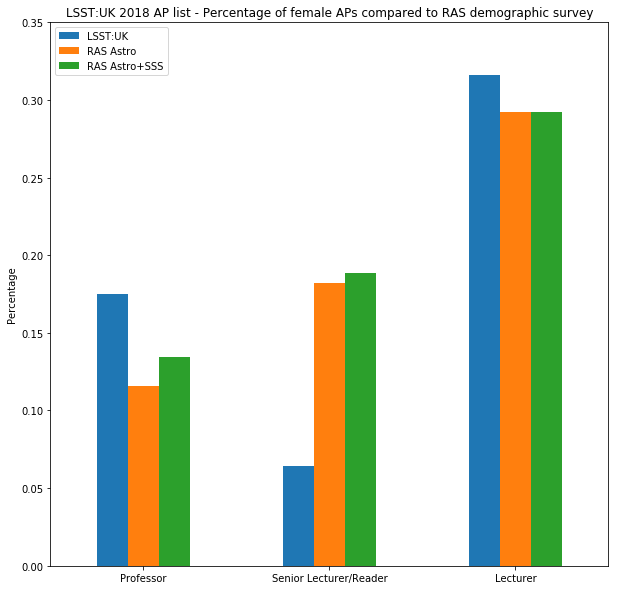

In [68]:
mp.figure(figsize=(10,10))
ax1 = ras_lsst_new_comp[['lsst_percent_female', 'percent_f_astro', 'percentage_female_astro_sss']].plot.bar(x=ras_lsst_new_comp.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Percentage')
mp.title('LSST:UK 2018 AP list - Percentage of female APs compared to RAS demographic survey')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 0.4, 0.05))
mp.legend(["LSST:UK", "RAS Astro", "RAS Astro+SSS"], loc=2)
ax1.xaxis.label.set_visible(False)
mp.savefig('lsst_gender_balance_percentages_v2.pdf')



In [54]:
ras_lsst_new_comp['lsst_pred_f_astro_sss'] = np.around(ras_lsst_new_comp.percentage_female_astro_sss * ras_lsst_new_comp.lsst_total, 0)
ras_lsst_new_comp['lsst_pred_f_astro'] = np.around(ras_lsst_new_comp.percent_f_astro * ras_lsst_new_comp.lsst_total, 0)




Put some error bars on this too

In [72]:
ras_lsst_new_comp['lsst_total_female_err'] = np.sqrt(ras_lsst_new_comp.lsst_total_female)
ras_lsst_new_comp['lsst_pred_f_astro_err'] = np.sqrt(ras_lsst_new_comp.lsst_pred_f_astro)
ras_lsst_new_comp['lsst_pred_f_astro_sss_err'] = np.sqrt(ras_lsst_new_comp.lsst_pred_f_astro_sss)



<Figure size 720x720 with 0 Axes>

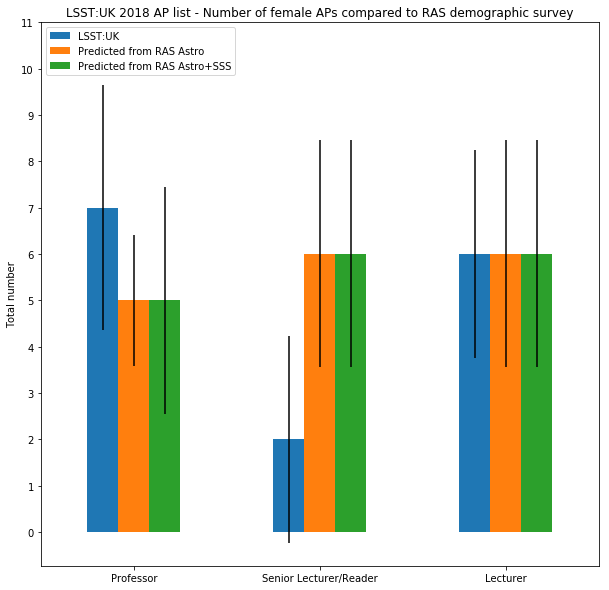

In [74]:
mp.figure(figsize=(10,10))
ax1 = ras_lsst_new_comp[['lsst_total_female', 'lsst_pred_f_astro', 'lsst_pred_f_astro_sss']].plot.bar(x=ras_lsst_new_comp.role, yerr = ras_lsst_new_comp[['lsst_total_female_err', 'lsst_pred_f_astro_err', 'lsst_pred_f_astro_sss_err']].values, figsize=(10,10), rot=0)
ind = np.arange(3)
mp.ylabel('Total number')
mp.title('LSST:UK 2018 AP list - Number of female APs compared to RAS demographic survey')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 12, 1))
mp.legend(["LSST:UK", "Predicted from RAS Astro", "Predicted from RAS Astro+SSS"], loc=2)
ax1.xaxis.label.set_visible(False)



mp.savefig('lsst_gender_balance_totals_v2.pdf')

# What about distribution according to roles rather than gender?

We have pretty small number statistics for gender, but how do we track the parent population for roles (ignoring gender)?

In [75]:
ras_lsst_new_comp

,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total,lsst_total_female,lsst_total_male,lsst_pred_f_astro_sss,lsst_pred_f_astro,lsst_total_female_err,lsst_pred_f_astro_err,lsst_pred_f_astro_sss_err
0,prof,256,56,0.116,0.212,30.0,12.0,312,42.0,0.134615,0.175000,40,7,33,5.0,5.0,2.645751,2.236068,2.236068
1,sl_r,165,47,0.182,0.222,30.0,10.0,212,40.0,0.188679,0.064516,31,2,29,6.0,6.0,1.414214,2.449490,2.449490
2,lec,106,31,0.292,0.276,31.0,9.0,137,40.0,0.291971,0.315789,19,6,13,6.0,6.0,2.449490,2.449490,2.449490


In [78]:
total_ras_astro = sum(ras_lsst_new_comp.n_astro)
total_ras_sss = sum(ras_lsst_new_comp.n_sss)
total_ras_astro_sss = total_ras_astro + total_ras_sss
print(total_ras_astro, total_ras_sss, total_ras_astro_sss)

527 134 661


In [79]:
ras_lsst_new_comp['percent_ras_astro'] = ras_lsst_new_comp.n_astro / total_ras_astro
ras_lsst_new_comp['percent_ras_sss'] = ras_lsst_new_comp.n_sss / total_ras_sss
ras_lsst_new_comp['percent_ras_astro_sss'] = (ras_lsst_new_comp.n_astro +  ras_lsst_new_comp.n_sss) / total_ras_astro_sss

ras_lsst_new_comp


,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,...,lsst_total_female,lsst_total_male,lsst_pred_f_astro_sss,lsst_pred_f_astro,lsst_total_female_err,lsst_pred_f_astro_err,lsst_pred_f_astro_sss_err,percent_ras_astro,percent_ras_sss,percent_ras_astro_sss
0,prof,256,56,0.116,0.212,30.0,12.0,312,42.0,0.134615,...,7,33,5.0,5.0,2.645751,2.236068,2.236068,0.485769,0.417910,0.472012
1,sl_r,165,47,0.182,0.222,30.0,10.0,212,40.0,0.188679,...,2,29,6.0,6.0,1.414214,2.449490,2.449490,0.313093,0.350746,0.320726
2,lec,106,31,0.292,0.276,31.0,9.0,137,40.0,0.291971,...,6,13,6.0,6.0,2.449490,2.449490,2.449490,0.201139,0.231343,0.207262


In [80]:
ras_lsst_new_comp.columns

Index(['role', 'n_astro', 'n_sss', 'percent_f_astro', 'percent_f_sss',
       'n_female_astro_round', 'n_female_sss_round', 'n_total_astro_sss',
       'n_female_total_astro_sss', 'percentage_female_astro_sss',
       'lsst_percent_female', 'lsst_total', 'lsst_total_female',
       'lsst_total_male', 'lsst_pred_f_astro_sss', 'lsst_pred_f_astro',
       'lsst_total_female_err', 'lsst_pred_f_astro_err',
       'lsst_pred_f_astro_sss_err', 'percent_ras_astro', 'percent_ras_sss',
       'percent_ras_astro_sss'],
      dtype='object')

In [81]:
ras_lsst_new_comp['lsst_percents'] = ras_lsst_new_comp.lsst_total / lsst_total_ap

In [82]:
ras_lsst_new_comp

,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,...,lsst_total_male,lsst_pred_f_astro_sss,lsst_pred_f_astro,lsst_total_female_err,lsst_pred_f_astro_err,lsst_pred_f_astro_sss_err,percent_ras_astro,percent_ras_sss,percent_ras_astro_sss,lsst_percents
0,prof,256,56,0.116,0.212,30.0,12.0,312,42.0,0.134615,...,33,5.0,5.0,2.645751,2.236068,2.236068,0.485769,0.417910,0.472012,0.444444
1,sl_r,165,47,0.182,0.222,30.0,10.0,212,40.0,0.188679,...,29,6.0,6.0,1.414214,2.449490,2.449490,0.313093,0.350746,0.320726,0.344444
2,lec,106,31,0.292,0.276,31.0,9.0,137,40.0,0.291971,...,13,6.0,6.0,2.449490,2.449490,2.449490,0.201139,0.231343,0.207262,0.211111


<Figure size 720x720 with 0 Axes>

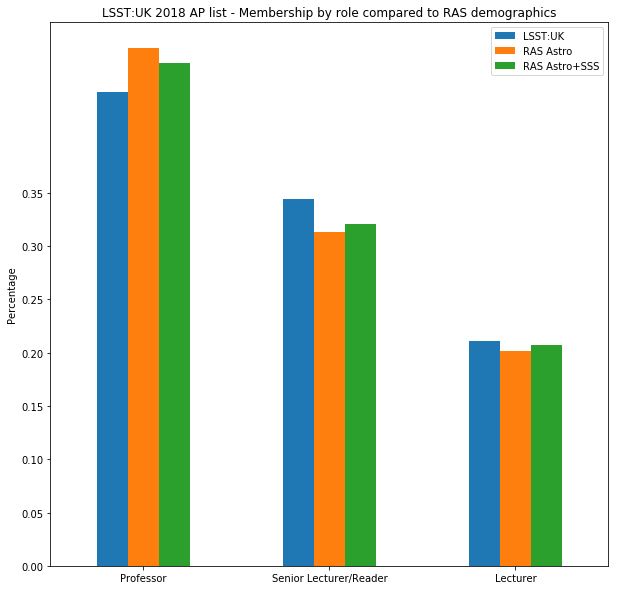

In [84]:
mp.figure(figsize=(10,10))
ax1 = ras_lsst_new_comp[['lsst_percents', 'percent_ras_astro', 'percent_ras_astro_sss']].plot.bar(x=ras_lsst_new_comp.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Percentage')
mp.title('LSST:UK 2018 AP list - Membership by role compared to RAS demographics')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 0.4, 0.05))
mp.legend(["LSST:UK", "RAS Astro", "RAS Astro+SSS"], loc=1)
ax1.xaxis.label.set_visible(False)
mp.savefig('lsst_roles_v2.pdf')



In [ ]:
mp.figure(figsize=(10,10))
ax1 = ras_lsst_new_comp[['lsst_percents', 'percent_ras_astro', 'percent_ras_astro_sss']].plot.bar(x=ras_lsst_new_comp.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Percentage')
mp.title('LSST:UK 2018 AP list - Membership by role compared to RAS demographics')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 0.4, 0.05))
mp.legend(["LSST:UK", "RAS Astro", "RAS Astro+SSS"], loc=1)
ax1.xaxis.label.set_visible(False)
mp.savefig('lsst_roles_v2.pdf')

# Depreciated

In [165]:
lsst_df

,first_name,last_name,last_year,gender,role
0,Filipe,Abdalla,2020,m,slr
1,Omar,Almaini,2020,m,p
2,Farrukh,Azfar,2020,m,l
3,David,Bacon,2019,m,slr
4,Vasily,Belokurov,2019,m,slr
5,Malcolm,Bremer,2020,m,p
6,Sarah,Bridle,2019,f,p
7,Michael,Brown,2019,m,p
8,Erminia,Calabrese,2019,f,l
9,Michael,Childress,2018,m,l


In [166]:
lsst_df['n_female_astro_ras'] = (lsst_df.percent_female_astro_ras / 100.) * ras_total_astro

AttributeError: 'DataFrame' object has no attribute 'percent_female_astro_ras'

In [ ]:
lsst_df['n_female_ss_ras'] = (lsst_df.percent__female_ss_ras / 100.) * ras_total_ss

In [ ]:
lsst_df

In [ ]:
total_astro_ss_ras = ras_total_astro + ras_total_ss
total_astro_ss_ras

In [ ]:
lsst_df['ras_female_ss_astro_comb'] = lsst_df.n_female_astro_ras + lsst_df.n_female_ss_ras
lsst_df['ras_female_pc_astro_ss_comp'] = lsst_df.ras_female_ss_astro_comb / total_astro_ss_ras

In [ ]:
lsst_df

In [ ]:
lsst_total = 90.

In [ ]:
lsst_df['percent_female_lsst'] = lsst_df.n_female_lsst / lsst_total

In [ ]:
lsst_df

In [ ]:
lsst_df.set_index(['role'])

In [ ]:
mp.figure(figsize=(10,10))
lsst_df[['ras_female_pc_astro_ss_comp', 'percent_female_lsst']].plot.bar(x=lsst_df.role, figsize=(10,10))
mp.savefig('lsst_gender_balance.pdf')